# Homework 4: Variational Inference

Created: 11/19/2023 by Tom Lever

Updated: 11/19/2023 by Tom Lever

1.  Use the EM implementation for Gaussian Mixture Models (GMM's) in sklearn to segment the image `Haiti_Image.tif` into four classes. Then answer the following questions:

    - Segment the image using K-means using 4 classes by selecting appropriate parameters in the GMM sklearn function. Compare the classification results obtained with the GMM to those obtained from K-means (KM) segmentation of the same image. Show the results of the two approaches to segmentation as images with the separate classes shown in different colors. Comment on the similarities and ifferences in the two segmentations.

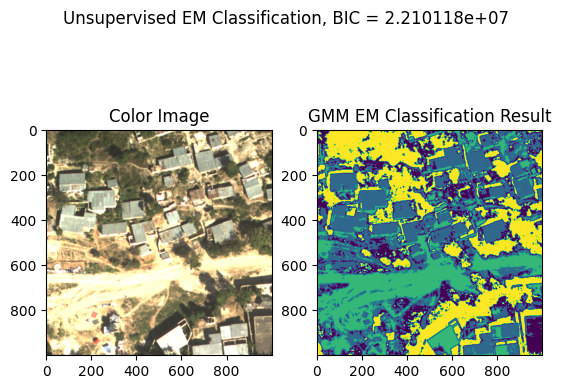

In [1]:
# Unsupervised Image Classification
# using Gaussian Mixture Model Expectation Maximization
# by William F. Basener
# University of Virginia, School of Data Science

from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# read the image and convert to numpy array
im = Image.open('Haiti_Image.tif')
imArray = np.array(im)
nrows, ncols, nbands = np.shape(imArray)

# reshape the image array to num_observations by num_features (1,000,000 by 3)
X = np.reshape(imArray,[nrows*ncols,nbands])

# Create and train our Gaussian Mixture Expectation Maximization Model
model = GaussianMixture(n_components=4, tol=0.1)
model.fit(X)
# predict latent values
yhat = model.predict(X)

# reshape the result into an image
imSubset_hat = np.reshape(yhat,[nrows,ncols])

# plot the output, including the BIC in the title
plt.figure()
plt.suptitle('Unsupervised EM Classification, BIC = '+"{:e}".format(model.bic(X)))
plt.subplot(121)
plt.imshow(imArray)
plt.title('Color Image')
plt.subplot(122)
plt.imshow(imSubset_hat)
plt.title('GMM EM Classification Result')
plt.show()

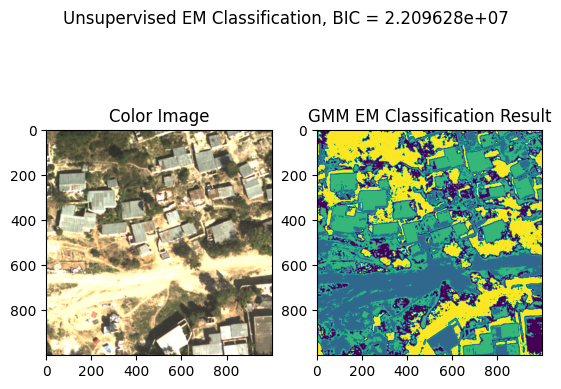

In [2]:
# Unsupervised Image Classification
# using Gaussian Mixture Model Expectation Maximization
# by William F. Basener
# University of Virginia, School of Data Science

from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# read the image and convert to numpy array
im = Image.open('Haiti_Image.tif')
imArray = np.array(im)
nrows, ncols, nbands = np.shape(imArray)

# reshape the image array to num_observations by num_features (1,000,000 by 3)
X = np.reshape(imArray,[nrows*ncols,nbands])

# Create and train our Gaussian Mixture Expectation Maximization Model
model = GaussianMixture(n_components=4, tol=0.1, init_params = 'kmeans')
model.fit(X)
# predict latent values
yhat = model.predict(X)

# reshape the result into an image
imSubset_hat = np.reshape(yhat,[nrows,ncols])

# plot the output, including the BIC in the title
plt.figure()
plt.suptitle('Unsupervised EM Classification, BIC = '+"{:e}".format(model.bic(X)))
plt.subplot(121)
plt.imshow(imArray)
plt.title('Color Image')
plt.subplot(122)
plt.imshow(imSubset_hat)
plt.title('GMM EM Classification Result')
plt.show()

GMM with and without `init_params = 'kmeans'` generate images of the same colors, though with different uses of those colors. Generally, the same objects are shaded in the same manners between the two images, though with different colors. It seems that the models recognize rooftops, highly reflective roads and rooftops, sparse brush, and deep woods or shadows.

Write the equation for the posterior prediction by a Gaussian Mixture Model of the probability of the class label for each data point in the image.

In a Gaussian Mixture Model (GMM), the posterior probability of a data point belonging to a particular component or class of the mixture is calculated using Bayes's Theorem. Let's denote the posterior probability of data point $x_i$ belonging to the $k$-th component or class as $P\left(Component_k | x_i\right)$. The GMM posterior probability is calculated using the following equation:

$$P\left(Component_k | x_i\right) = \frac{\pi_k \ N\left(x_i | \mu_k, \Sigma_k\right)}{\sum_{j = 1}^K \left[\pi_j \ N\left(x_i | \mu_j, \Sigma_j\right)\right]}$$

Here:

$\pi_k$ is the mixing coefficient of the $k$-th component, representing the prior probability of choosing the $k$-th component,

$N\left(x_i | \mu_k \Sigma_k\right)$ is the likelihood and multivariate Gaussian probability density distribution with mean $\mu_k$ and covariance matrix $\Sigma_k$,

The denominator is the sum over all components $j$ of the product of the corresponding mixing coefficient and the likelihood.

In the context of a Gaussian Mixture Model, the class labels are often considered as the component indices.

It's important to note that $\sum_{j = 1}^K \left(\pi_j\right) = 1$ as the mixing coefficients represent a valid probability mass distribution. The Gaussian Mixture Model assigns a probability distribution over the components or classes rather than a deterministic label.

Show four separate images, one for each class, that color code the probabilities of a class label for each data point in the image.

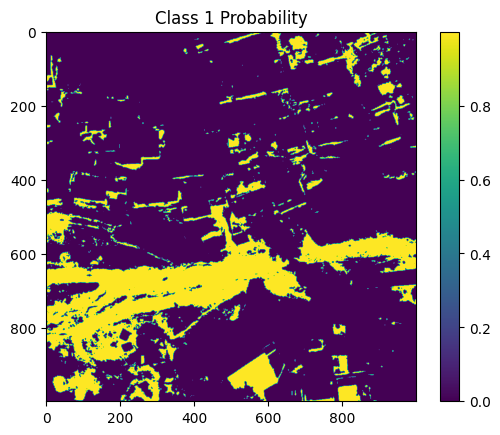

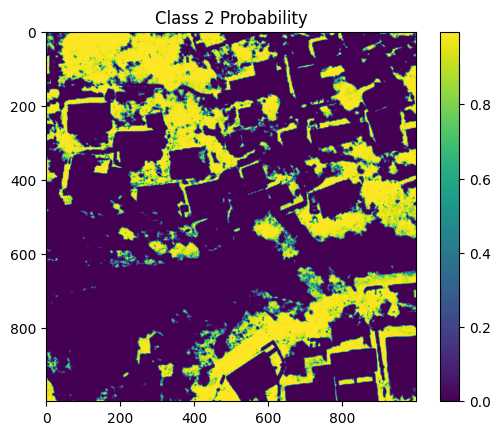

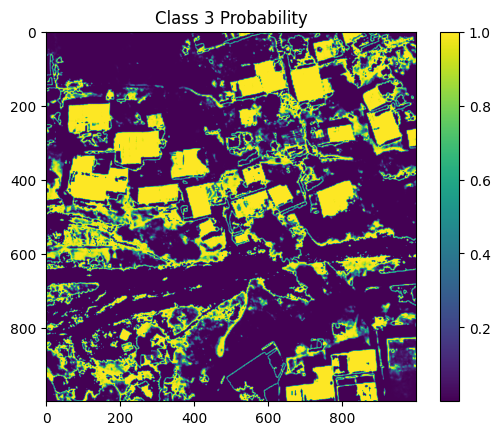

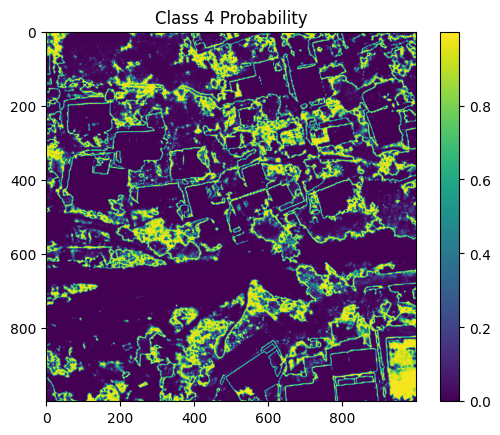

In [3]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def visualize_probabilities(probabilities, nrows, ncols):
    # Reshape probabilities to match the image shape
    prob_image = np.reshape(probabilities, [nrows, ncols, 4])

    # Create a separate image for each class
    class_images = [prob_image[:, :, i] for i in range(4)]

    return class_images

# Load the image
im = Image.open('Haiti_Image.tif')
imArray = np.array(im)
nrows, ncols, nbands = np.shape(imArray)
X = np.reshape(imArray, [nrows * ncols, nbands])

# Fit a Gaussian Mixture Model
model = GaussianMixture(n_components=4, tol=0.1)
model.fit(X)

# Get the probabilities for each data point
probabilities = model.predict_proba(X)

# Use the probabilities to color code each pixel in the original image
class_images = visualize_probabilities(probabilities, nrows, ncols)

# Plot and save each class image
for i, class_image in enumerate(class_images):
    plt.figure()
    plt.imshow(class_image, cmap='viridis')  # You can choose a different colormap if needed
    plt.title(f'Class {i+1} Probability')
    plt.colorbar()
    plt.savefig(f'class_{i+1}_probability_image.png')
    plt.show()

Comment on the insights provided by this probabilistic view of the segmentation.

This probabilistic view of the segmentation isolates pixels highly likely to be in each component or class.

This view suggests points that are highly likely, moderately likely, moderately unlikely, or highly unlikely to be in each component or class.

This view gives a sense of the uncertainty that a point or a group of points is in each component or class.

Very briefly describe an example of how this probabilistic perspective might be used by governmental or non-profit agencies concerned with improving the environment or the living conditions in Haiti.

Governmental or non-profit agencies may visit areas that are highly likely to be buildings, or areas that are highly likely to be towns or cities, to deliver aid as efficiently as possible.